In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import sys
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
from src.modeling.train_sentiment import train_and_evaluate_sentiment

In [4]:
sns.set(style="whitegrid")

## Training & evaluation

In [5]:
# Step 1: Execute model training and evaluation
train_and_evaluate_sentiment()
print("Sentiment model pipeline executed.")

Epoch 1/30
731/731 - 67s - loss: 2.3848 - accuracy: 0.4619 - val_loss: 0.9467 - val_accuracy: 0.5494 - lr: 0.0010 - 67s/epoch - 91ms/step
Epoch 2/30
731/731 - 69s - loss: 0.8682 - accuracy: 0.5931 - val_loss: 0.7421 - val_accuracy: 0.6735 - lr: 0.0010 - 69s/epoch - 95ms/step
Epoch 3/30
731/731 - 69s - loss: 0.7036 - accuracy: 0.6581 - val_loss: 0.5012 - val_accuracy: 0.7361 - lr: 0.0010 - 69s/epoch - 95ms/step
Epoch 4/30
731/731 - 77s - loss: 0.4999 - accuracy: 0.7263 - val_loss: 0.5060 - val_accuracy: 0.7425 - lr: 0.0010 - 77s/epoch - 105ms/step
Epoch 5/30
731/731 - 78s - loss: 0.5048 - accuracy: 0.7431 - val_loss: 0.5157 - val_accuracy: 0.7363 - lr: 0.0010 - 78s/epoch - 106ms/step
Epoch 6/30
731/731 - 73s - loss: 0.4678 - accuracy: 0.7551 - val_loss: 0.4137 - val_accuracy: 0.8295 - lr: 5.0000e-04 - 73s/epoch - 100ms/step
Epoch 7/30
731/731 - 78s - loss: 0.4417 - accuracy: 0.7749 - val_loss: 0.4628 - val_accuracy: 0.7867 - lr: 5.0000e-04 - 78s/epoch - 107ms/step
Epoch 8/30
731/731 - 7

In [6]:
# Load metrics report
import json
with open("../outputs/sentiment_accuracy.txt", "r") as f:
    report = json.load(f)

In [7]:
# Convert classification report to DataFrame
report_df = pd.DataFrame(report).T
report_df = report_df.round(3)
display(report_df)

,precision,recall,f1-score,support
extreme_negative,0.981,0.964,0.972,2695.000
negative,0.950,0.908,0.928,3943.000
neutral,0.911,0.970,0.939,3383.000
accuracy,0.944,0.944,0.944,0.944
macro avg,0.947,0.947,0.947,10021.000
weighted avg,0.945,0.944,0.944,10021.000


<Figure size 1000x400 with 0 Axes>

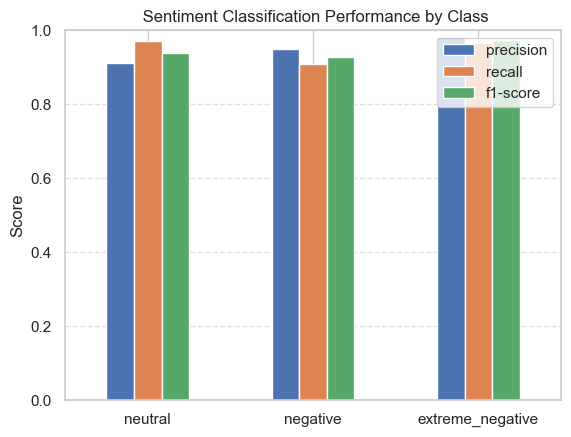

In [8]:
#  Visualize key performance metrics
plt.figure(figsize=(10, 4))
report_df.loc[["neutral", "negative", "extreme_negative"], ["precision", "recall", "f1-score"]].plot(kind="bar")
plt.title(" Sentiment Classification Performance by Class")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

In [10]:
#  Sample predictions
pred_df = pd.read_csv("../outputs/predictions_sentiment.csv")
display(pred_df.sample(20))

,true_sentiment,predicted_sentiment
555,neutral,neutral
6514,neutral,neutral
782,extreme_negative,extreme_negative
9827,neutral,neutral
7691,extreme_negative,extreme_negative
8723,neutral,neutral
8588,negative,negative
9515,extreme_negative,extreme_negative
8455,extreme_negative,extreme_negative
2191,negative,negative


In [16]:
# Save summary
summary_path = "../outputs/profiling/model_training_evauation_summary.md"
with open(summary_path, "w") as f:
    f.write("Model Training & Evaluation Summary\n\n")
    f.write("** Training progression: \n")
    f.write("    * Started at 46.2% training accuracy in epoch 1 and steadily improved each epoch.\n")
    f.write("    * By epoch 10, training accuracy reached 92.95%, and by epoch 15 it peaked at 96.39%. \n\n")
    f.write("** Validation performance: \n")
    f.write("    * Validation accuracy climbed from 54.94% in epoch 1 to a high of 94.86% at epoch 11. \n")
    f.write("    * After reducing the learning rate, val_accuracy stabilized around 94-95% through epoch 15. \n\n")
    f.write("** Final test accuracy: \n")
    f.write("   *The model achieved 94.4% accuracy on the held-out test set. \n\n")
    f.write("** Per-class metrics(test set): \n")
    f.write("   * Extreme Negative: Precision 98.1%, Recall 96.4%, F1 97.2% (2,695 samples)\n")
    f.write("   * Negative: Precision 95%, Recall 90.8%, F1 92.8% (3,943 samples)\n")
    f.write("   * Neutral: Precision 91.1%, Recall 97.0%, F1 93.9% (3,383 samples)\n\n")
    f.write("** Overall:\n")
    f.write("   * Macro-averaged F1: 94.7%\n")
    f.write("   * Weighted-averaged F1: 94.4%\n")
    
print(f"Model Training & Evaluation summary written to {summary_path}")

Model Training & Evaluation summary written to ../outputs/profiling/model_training_evauation_summary.md
